# Chapter 4: Overview of Statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special_fn

%matplotlib inline

## 4.2: Probability Distributions

For a probability distirubition $F(x)$, the *population mean* $\mu$ is defined as:
$$\mu = \int x d F(x)$$
The spread of variability in the population is measured by the *variance*:
$$\sigma^2 = \int_{-\infty}^{\infty} (x - \mu)^2 dF(x)$$

### Continuous Distributions
1. Normal distribution
2. Exponential distribution
3. Cauchy or Lorentz distribution
4. Beta distribution
5. Chi-square distribution
6. Student's t distribution
7. Pareto distribution

### Normal Distribution

$$F(x) = \frac{1}{\sqrt{2\pi \sigma}} exp\left(- \frac{(x-\mu)^2}{2\sigma^2} \right)$$
where $\mu$ is the mean of the distribution, $\sigma$ is the standard deviation, and $\sigma^2$ is the variance.

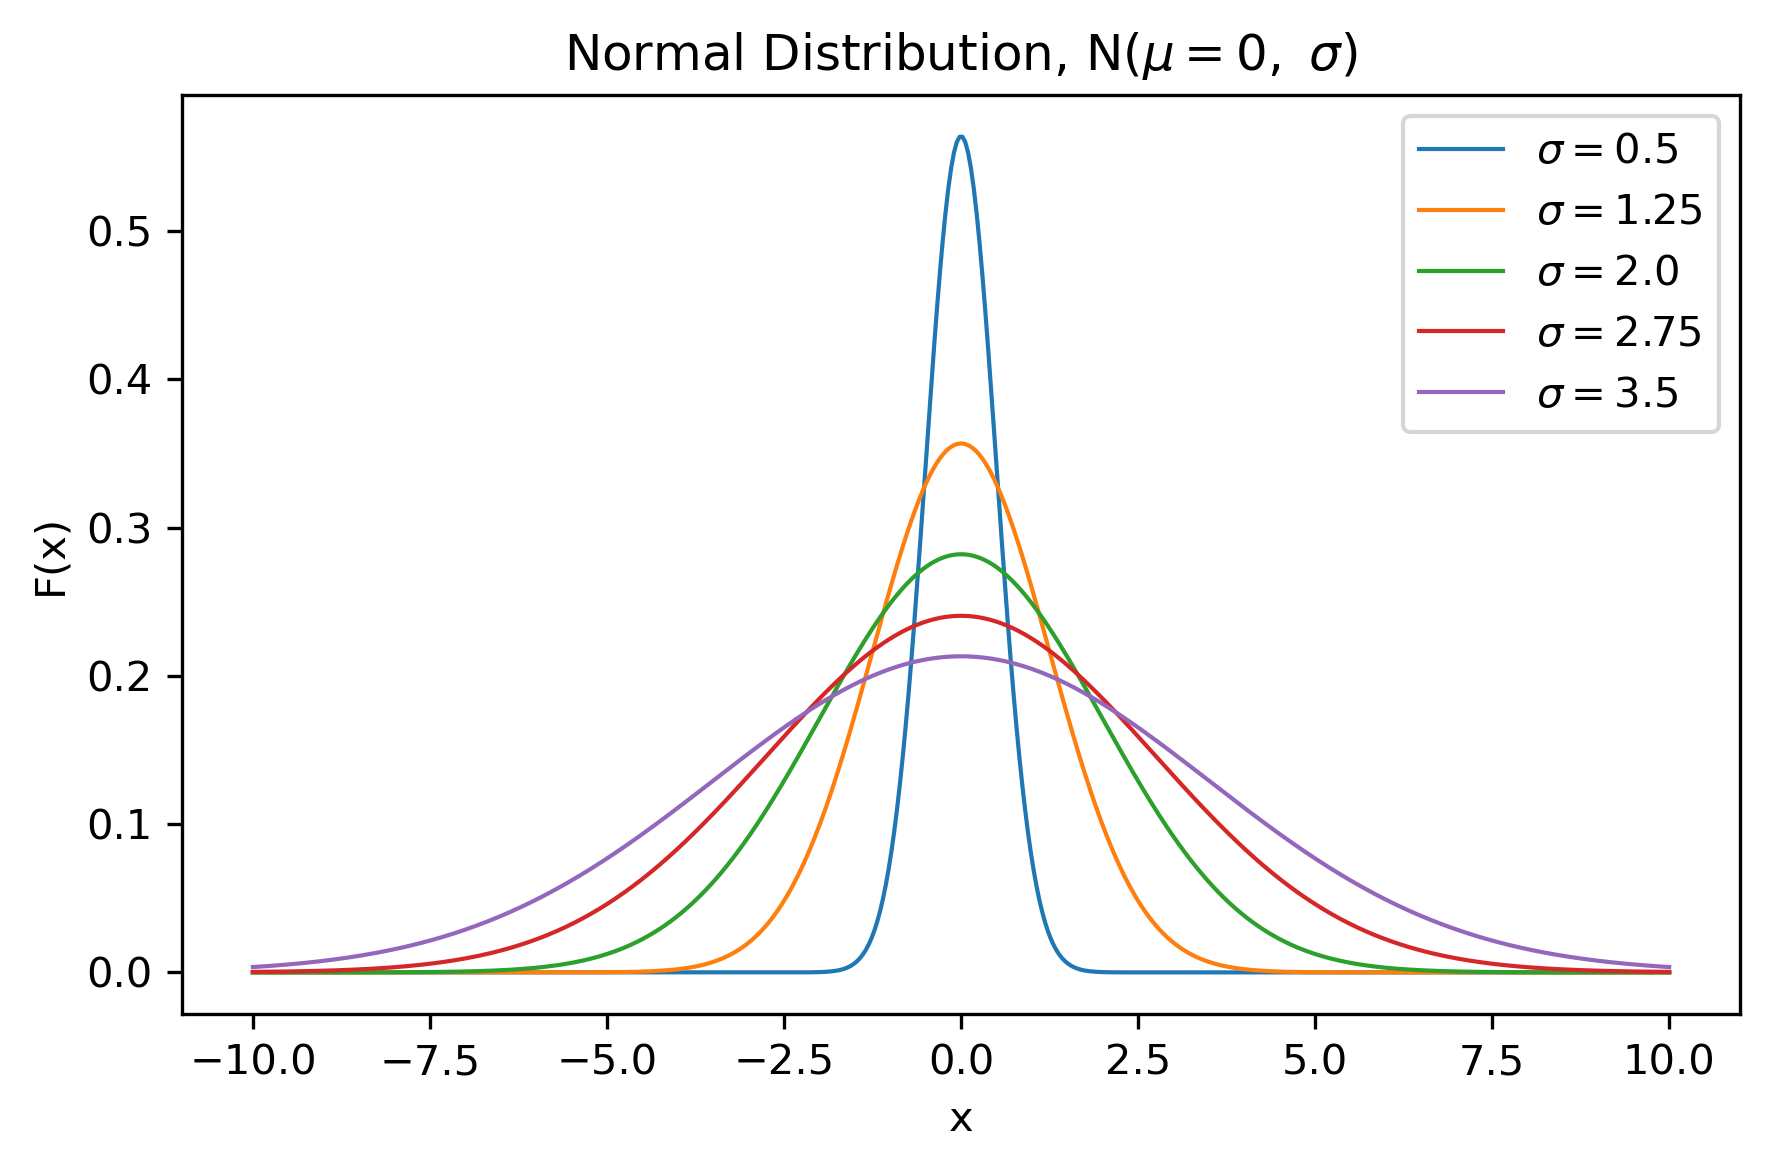

In [2]:
def normal_distribution(x, mu=0, sigma=1):
    F = 1. / np.sqrt(2 * np.pi * sigma) * np.exp(-1 * (x - mu)**2 / (2 * sigma**2) )
    return F


sigma = np.linspace(0.5, 3.5, 5)

x = np.linspace(-10, 10,500)

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
for i in range(len(sigma)):
    ax1.plot(x, normal_distribution(x, sigma=sigma[i]), lw=1, label=r'$\sigma = $'+str(sigma[i]))
    
    
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title(r'Normal Distribution, N($\mu = 0,\ \sigma$)')
ax1.legend(loc=0)
fig.tight_layout()
plt.show()


### Exponential Distribution

$$
F(x) = 
\begin{cases}
\begin{eqnarray} 
\alpha e^{-\alpha x}\ &,\ x > 0 \\ 
0 &\ ,\ x \leq 0  
\end{eqnarray}
\end{cases}
$$
where the mean is $1/\alpha$, and the variance is $\alpha^{-2}$.

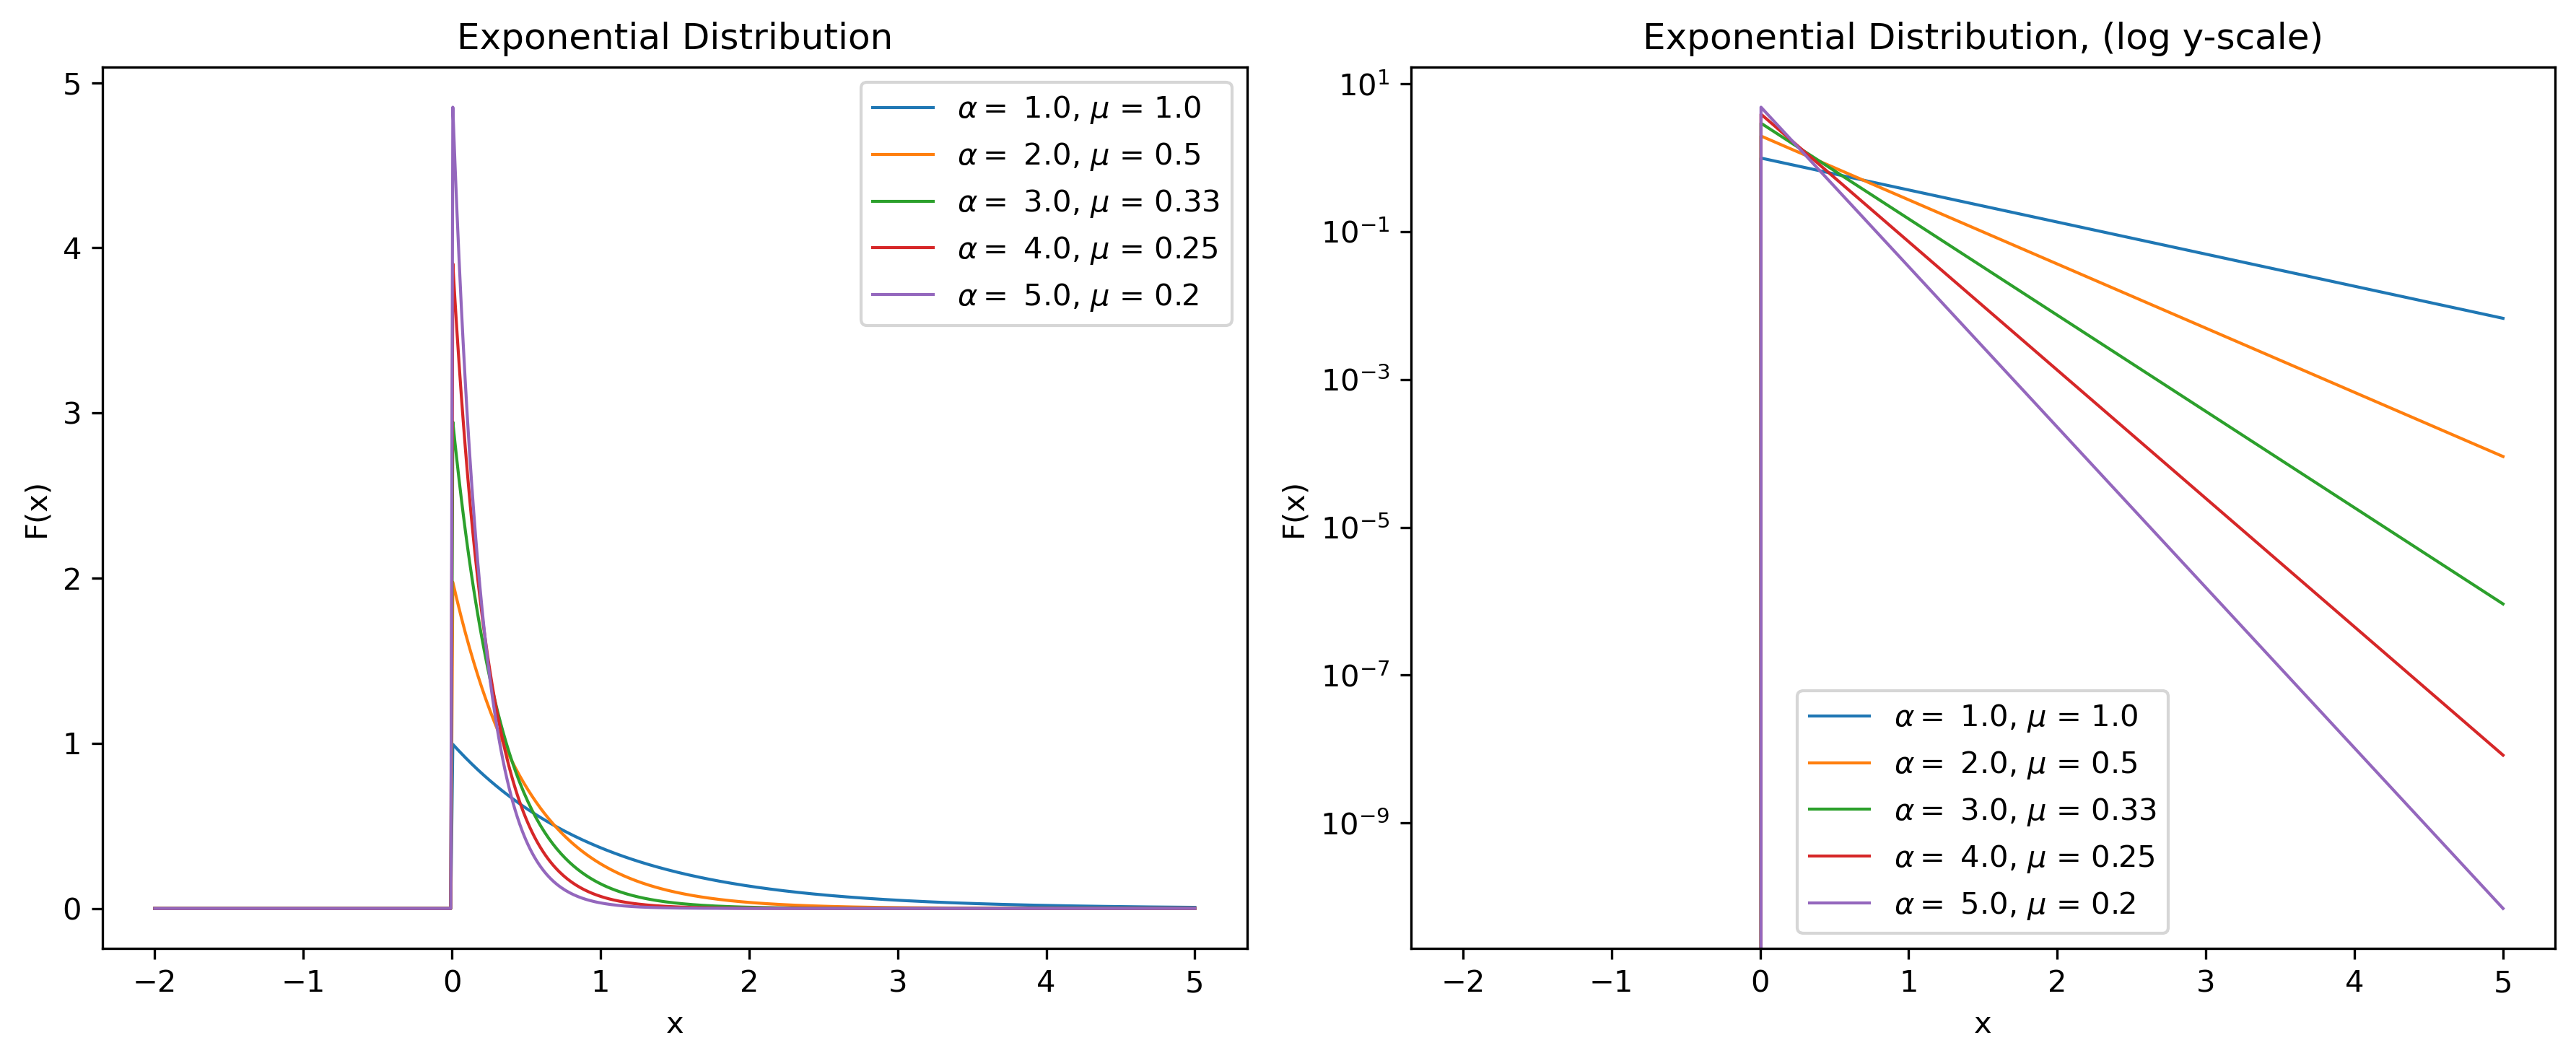

In [16]:
def exponential_distribution(x, alpha=1):
    F = np.zeros(len(x))
    q_0 = np.where(x <= 0.0)
    q_g = np.where(x > 0.0)
    
    F[q_0] = 0.0
    F[q_g] = alpha * np.exp(-alpha * x[q_g])
    
    return F


x = np.linspace(-2, 5, 500)

alpha = np.linspace(1, 5, 5)


fig = plt.figure(figsize=(12,5), dpi=300)
ax1 = fig.add_subplot(121)
for i in range(len(alpha)):
    mean = 1 / alpha[i]
    variance = 1 / alpha[i]**2
    ax1.plot(x, exponential_distribution(x, alpha=alpha[i]), lw=1, label=r'$\alpha =$ '+str(alpha[i])+', $\mu$ = '+str(np.round(mean, decimals=2)))
    
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title('Exponential Distribution')
ax1.legend(loc=0)


ax2 = fig.add_subplot(122)
for i in range(len(alpha)):
    mean = 1 / alpha[i]
    variance = 1 / alpha[i]**2
    ax2.plot(x, exponential_distribution(x, alpha=alpha[i]), lw=1, label=r'$\alpha =$ '+str(alpha[i])+', $\mu$ = '+str(np.round(mean, decimals=2)))
    
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title('Exponential Distribution, (log y-scale)')
ax2.legend(loc=0)
ax2.set_yscale('log')

fig.tight_layout()
plt.show()
    
    
    

### Cauchy Distribution or Lorentz Distribution
https://en.wikipedia.org/wiki/Cauchy_distribution

$$ 
F(x) = \frac{1}{\pi\ \gamma}  \frac{1}{\left[1 + (\frac{x-x_0}{\gamma}\ \ )^2\  \right]} 
$$
Cauchy distribution does not have mean or variance.

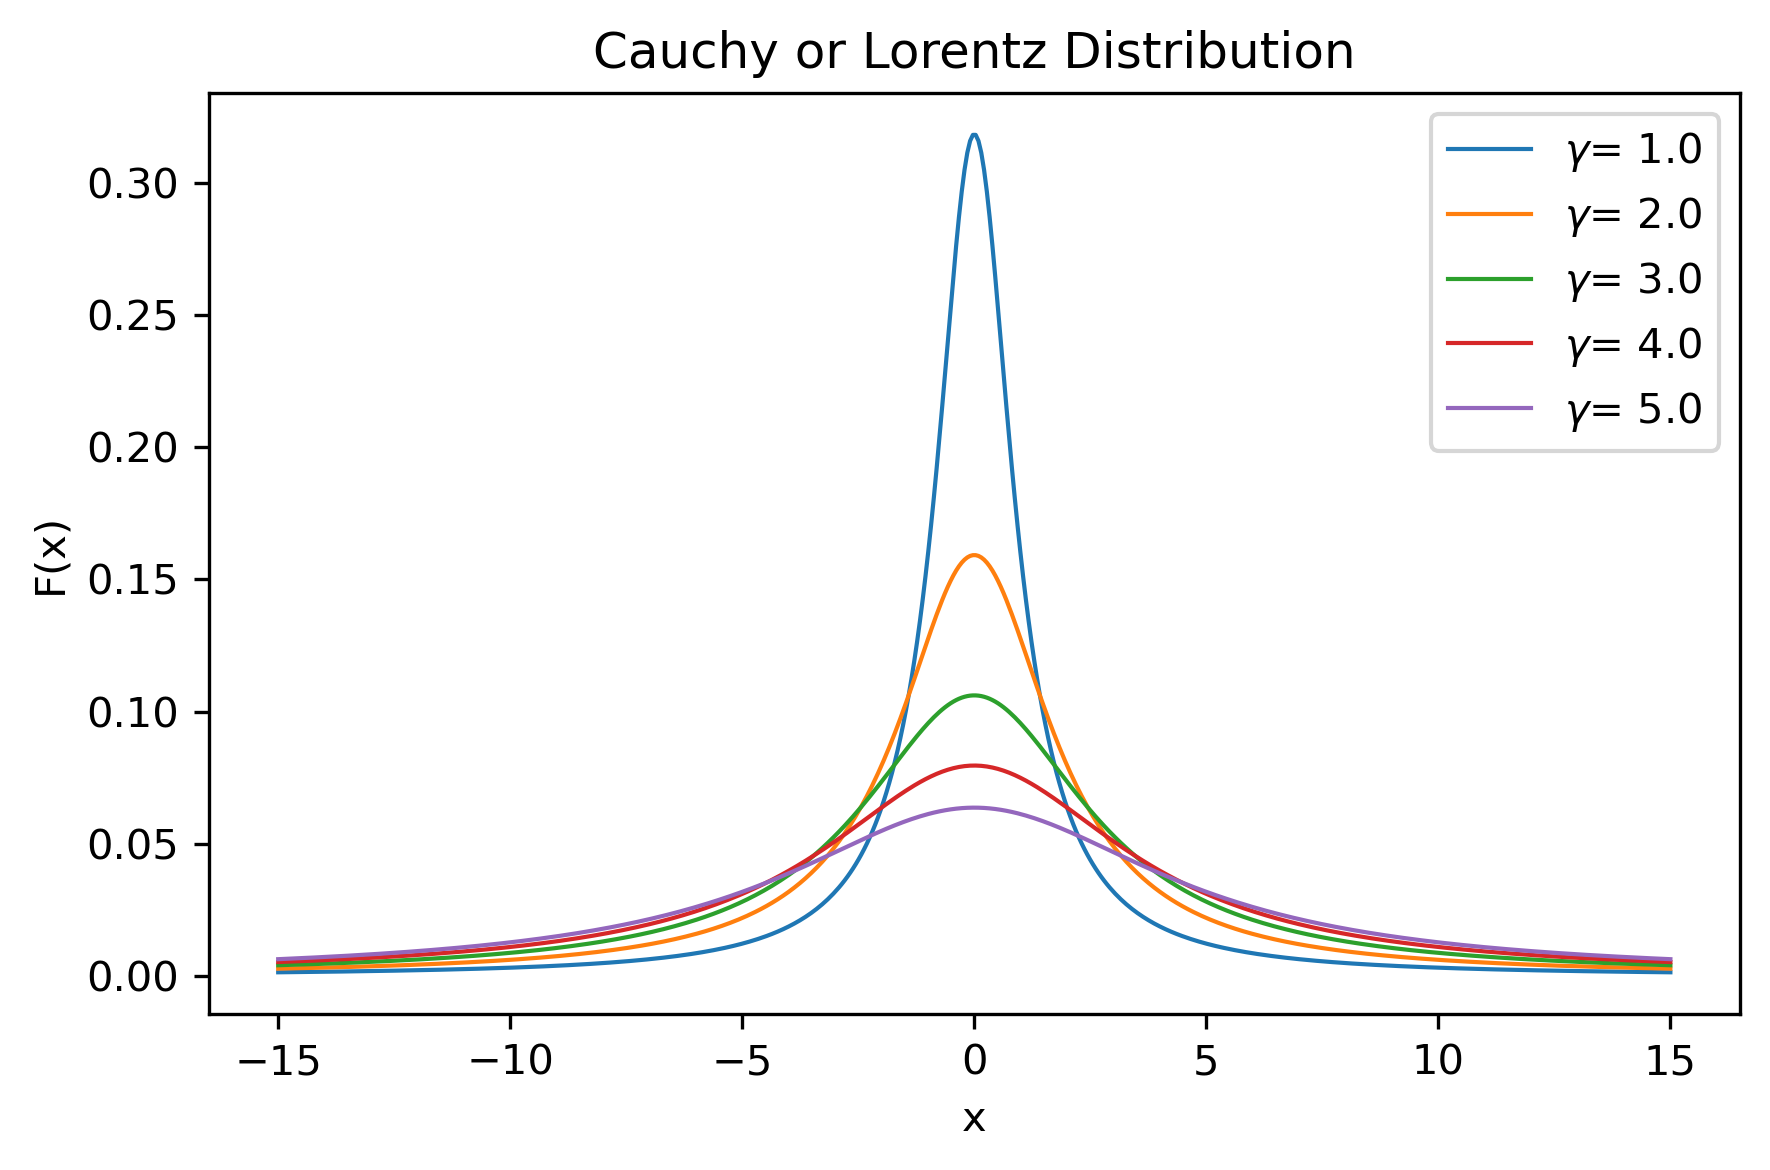

In [4]:
def cauchy_distribution(x, x_0 = 0.0, gamma = 1.0):
    F = 1 / (np.pi * gamma)  * 1 / ( 1 + ( (x - x_0) / gamma )**2 )
    return F


x = np.linspace(-15, 15, 500)
gamma = np.linspace(1, 5, 5)

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
for i in range(len(gamma)):
    ax1.plot(x, cauchy_distribution(x, gamma=gamma[i]), lw=1, label=r'$\gamma $= '+str(gamma[i]))
    
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title('Cauchy or Lorentz Distribution')
ax1.legend(loc=0)
fig.tight_layout()
plt.show()


### Beta Distribution
https://en.wikipedia.org/wiki/Beta_distribution

$$
F(x) = 
\begin{cases}
\begin{eqnarray}
\frac{1}{B(\alpha, \gamma)}\ x^{\alpha -1}\ (1- x)^{\beta -1}\ \  &\ , \ 0 \leq x \leq 1 \\
0 &\ , \ otherwise
\end{eqnarray}
\end{cases}
$$
where $B(\alpha, \gamma)$ is the beta function:
$$ B(\alpha, \gamma) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\ \Gamma(\beta)} = \int_{0}^{1}  t^{\alpha -1}\ \ (1 - t)^{\beta - 1}\ \ dt$$
The mean for this distribution is:
$$\mu = \frac{\alpha}{\alpha + \beta}$$
The variance for this distribution is:
$$\sigma^2 = \frac{\alpha \beta (\alpha + \beta)^{-2}}{(\alpha + \beta +1)} $$

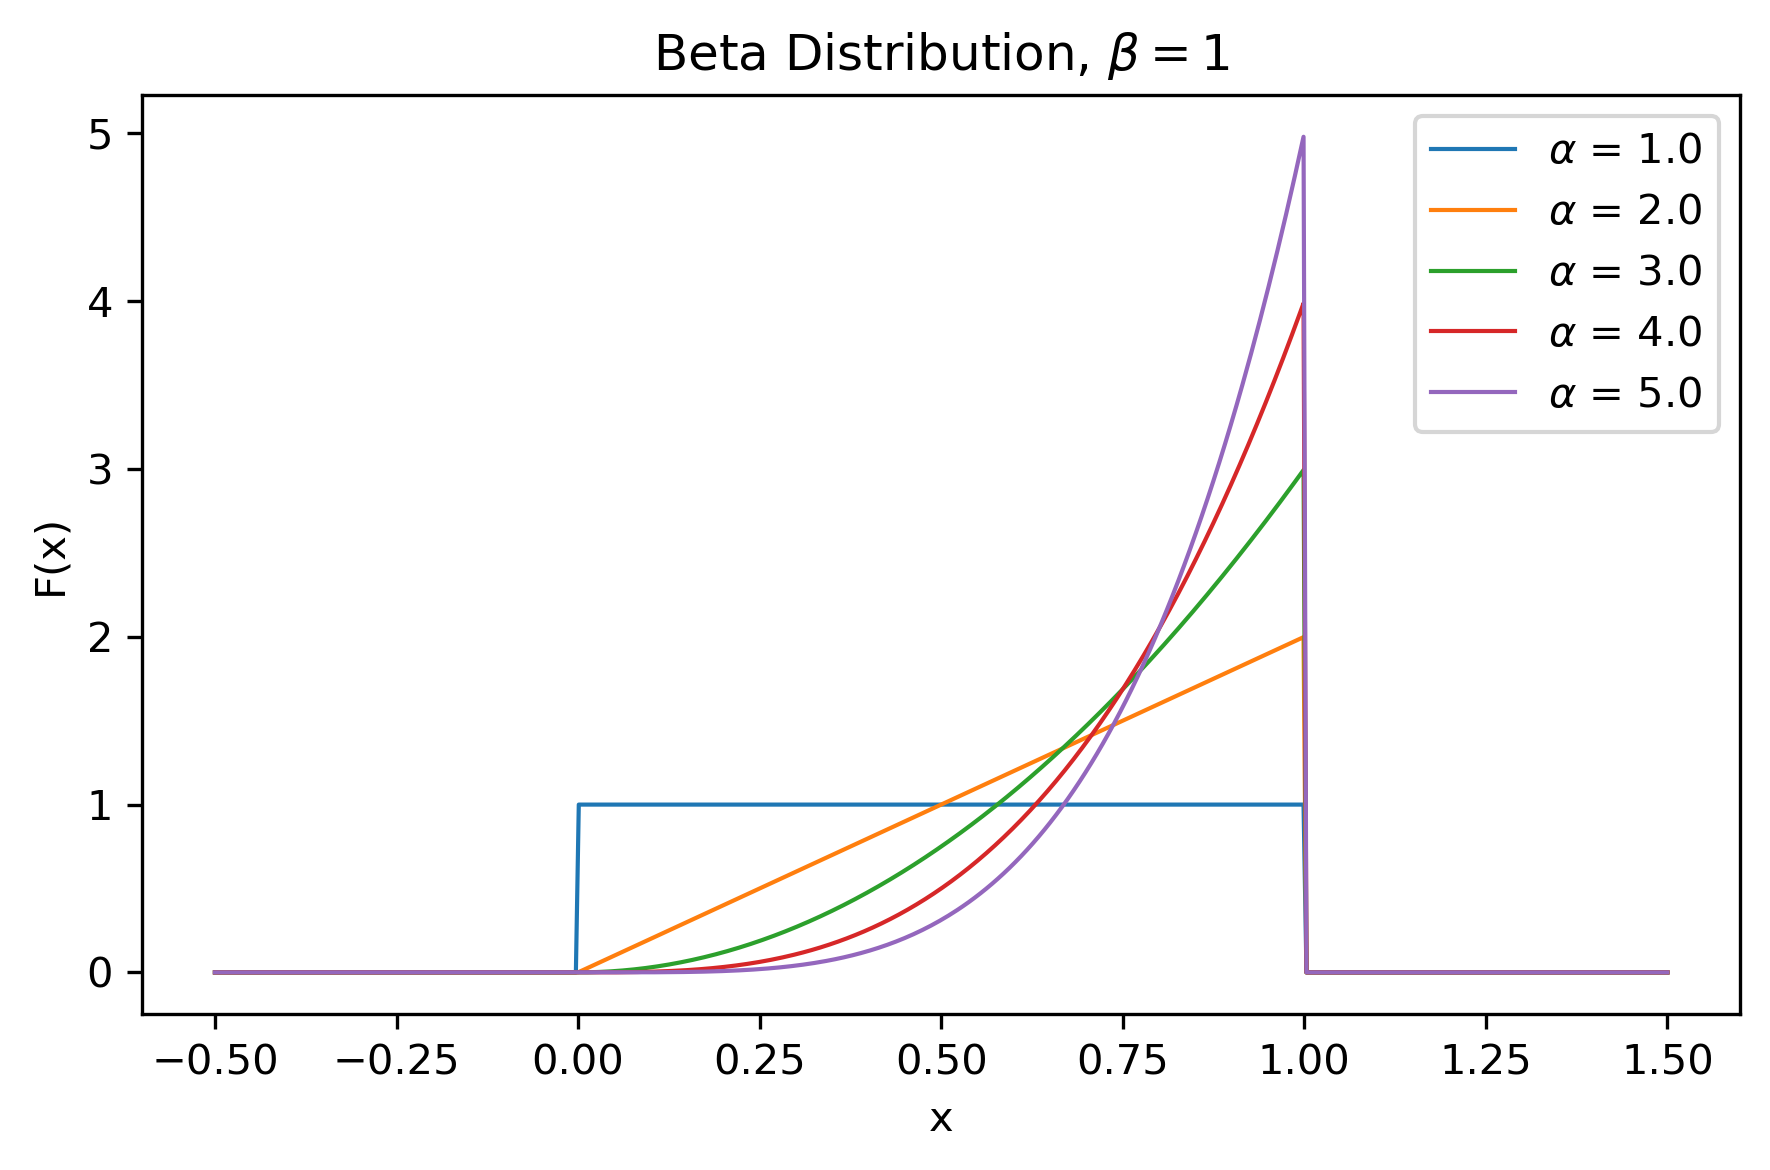

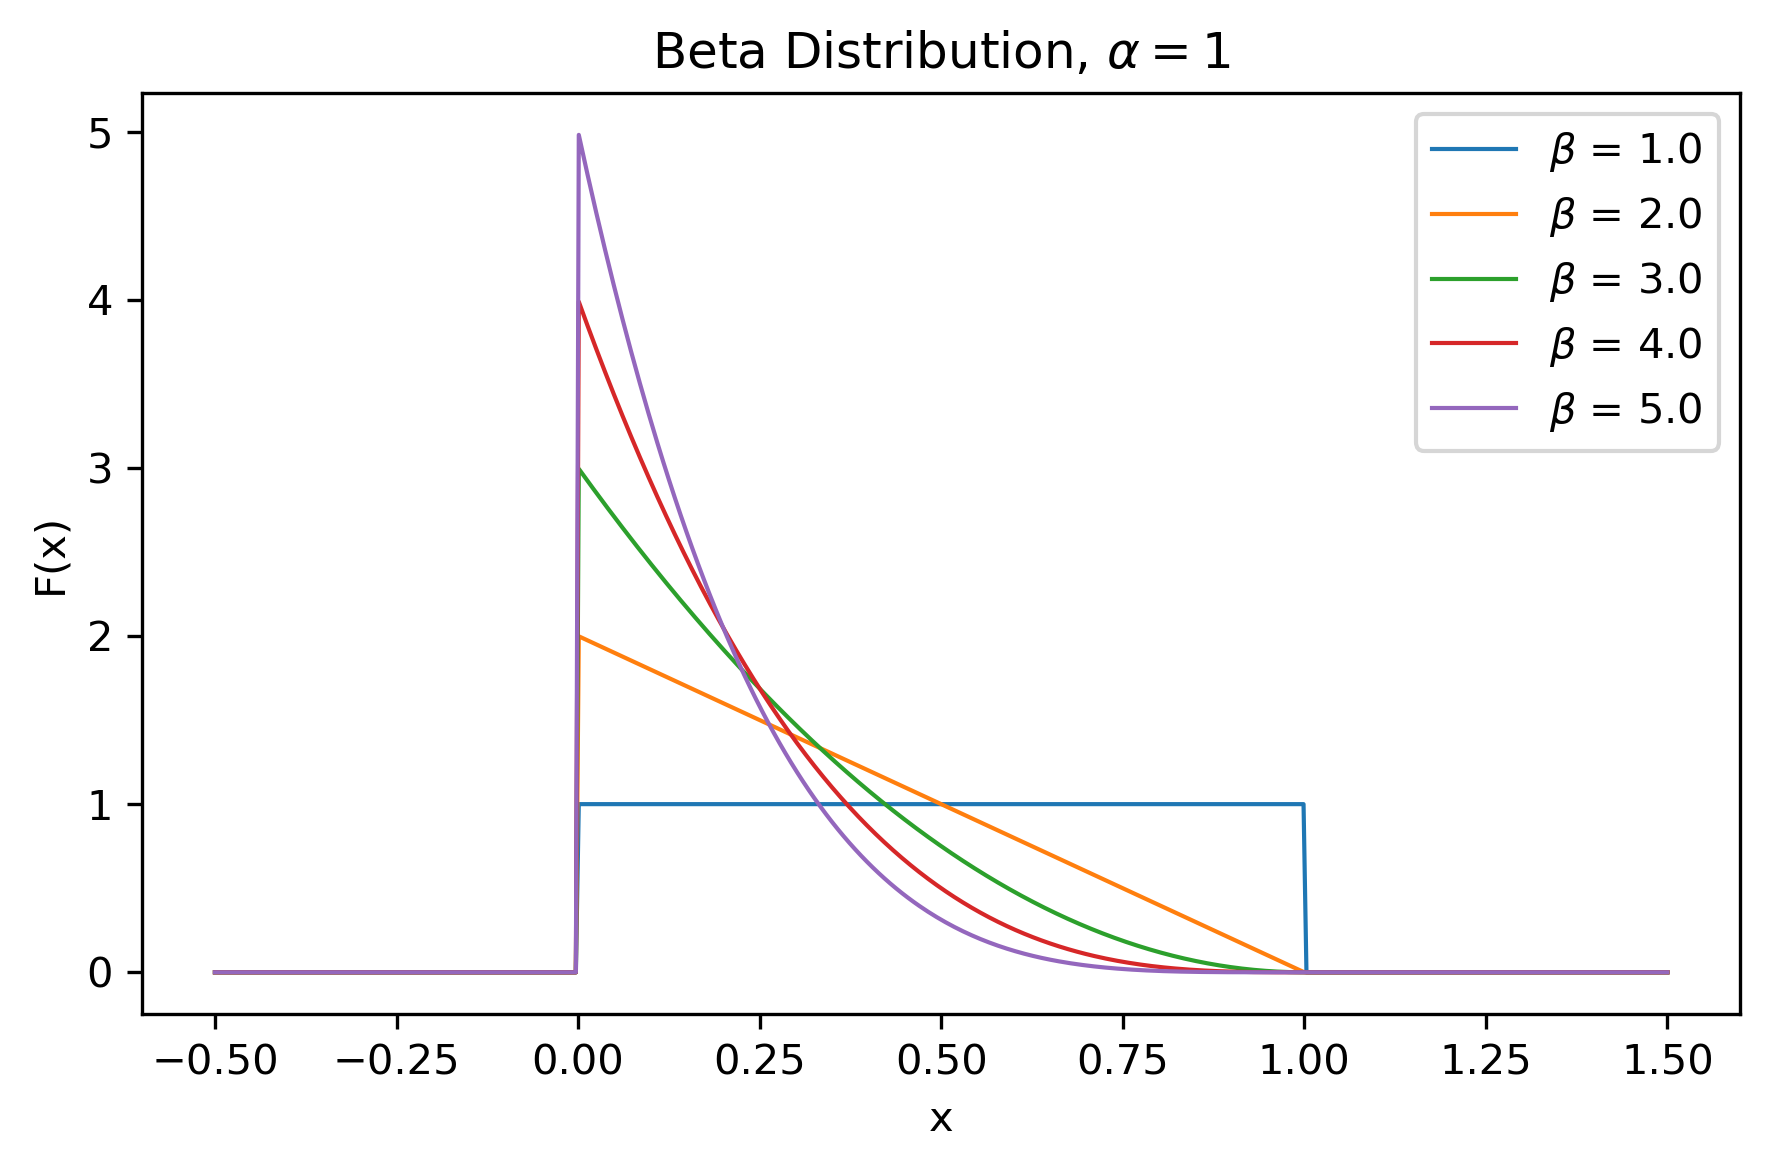

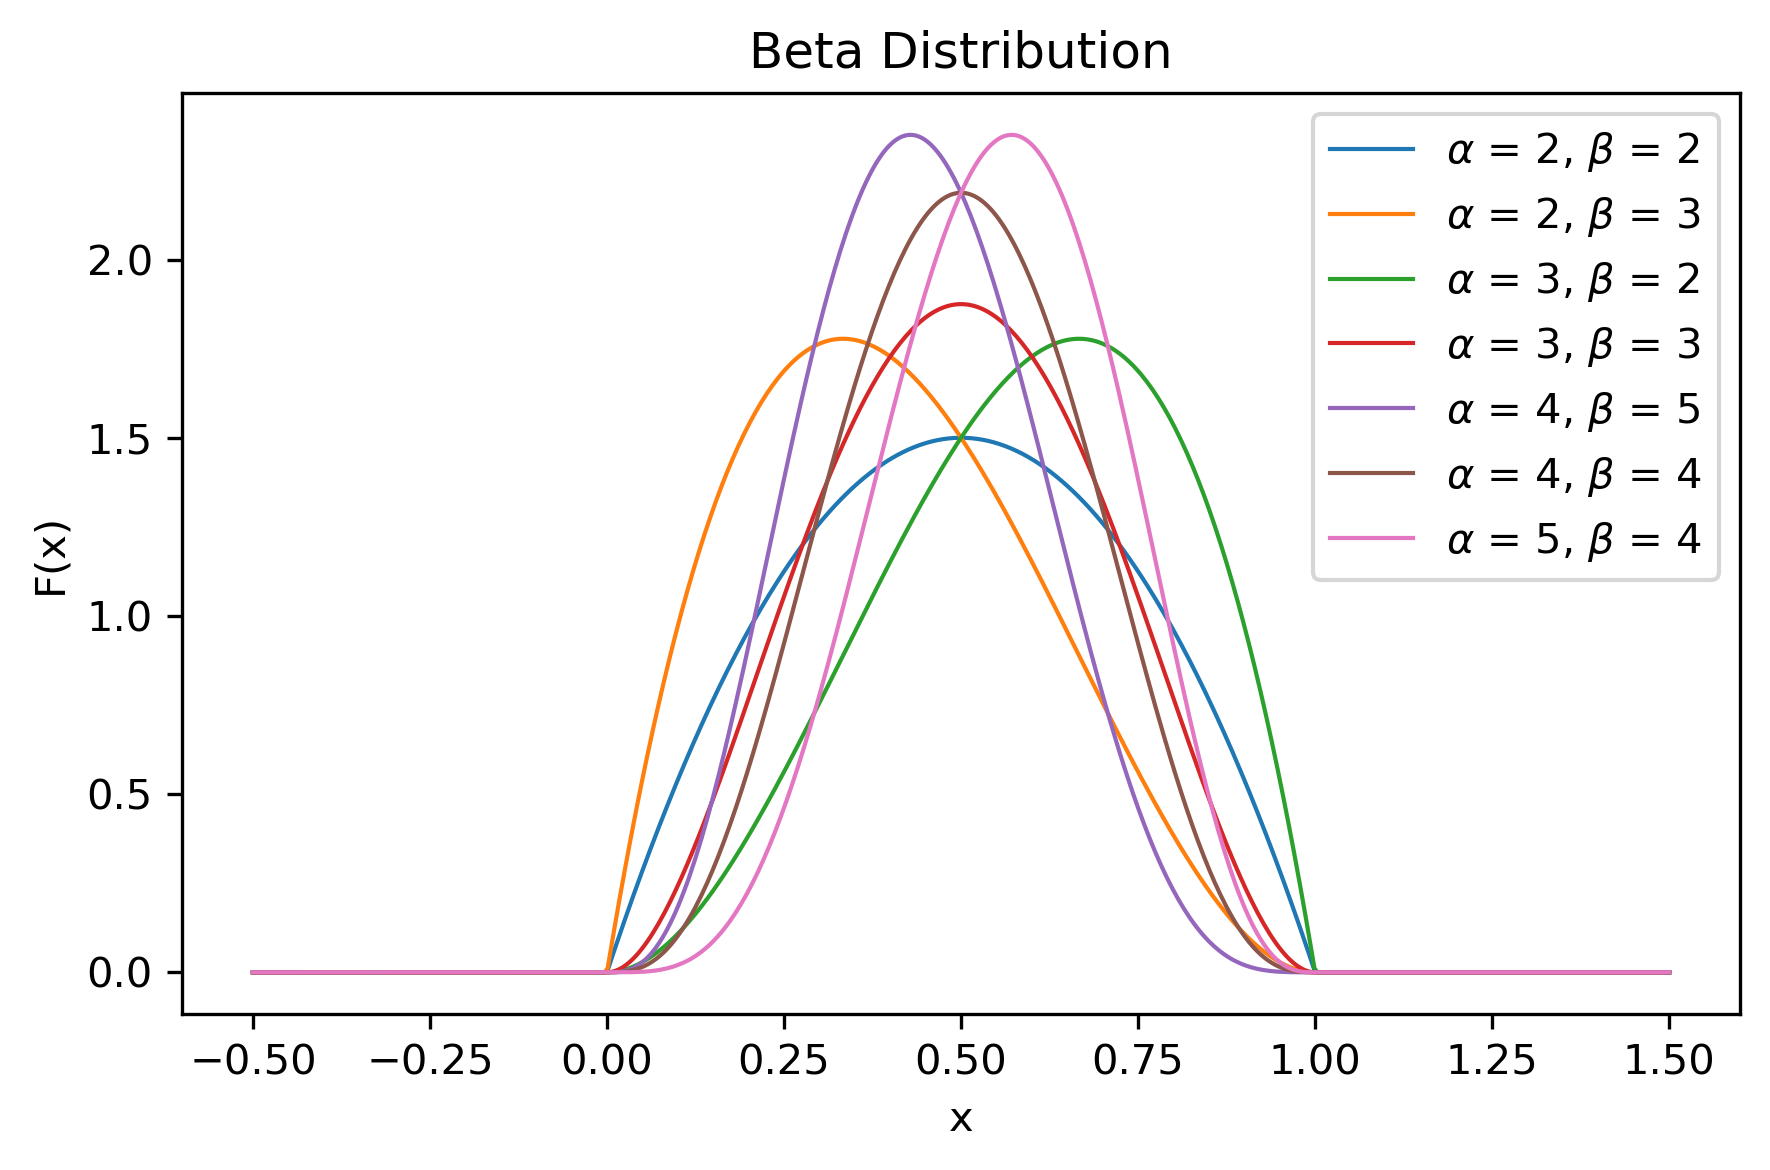

In [5]:
def beta_distribution(x, alpha=1, beta=1):
    t = np.linspace(0,1,1000)
    b_integrand = t**(alpha -1) * (1 - t)**(beta -1)
    B = np.trapz(b_integrand, x = t)
    
    F = np.zeros(len(x))
    q_in = np.where( (x >= 0) & (x <= 1) )
    F[q_in] = 1 / B * x[q_in]**(alpha - 1) * (1 - x[q_in])**(beta -1)
    
    return F

def beta_mean(alpha=1, beta=1):
    return alpha / (alpha + beta)

def beta_variance(alpha=1, beta=1):
    var = alpha * beta * (alpha + beta)**(-2) / (alpha + beta + 1)
    return var

alpha = np.linspace(1, 5, 5)
beta = np.linspace(1, 5, 5)  

x = np.linspace(-0.5, 1.5, 500)

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
for i in range(len(alpha)):
    ax1.plot(x, beta_distribution(x, alpha=alpha[i]), lw=1, label=r'$\alpha$ = '+str(alpha[i]))
    
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title(r'Beta Distribution, $\beta =1$')
ax1.legend(loc=0)    
fig.tight_layout()
plt.show()


fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
for i in range(len(beta)):
    ax1.plot(x, beta_distribution(x, beta=beta[i]), lw=1, label=r'$\beta$ = '+str(beta[i]))
    
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title(r'Beta Distribution, $\alpha =1$')
ax1.legend(loc=0)    
fig.tight_layout()
plt.show()


a = [2, 2, 3, 3, 4, 4, 5]
b = [2, 3, 2, 3, 5, 4, 4]

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
for i in range(len(a)):
    ax1.plot(x, beta_distribution(x, alpha=a[i], beta=b[i]), lw=1, label=r'$\alpha$ = '+str(a[i])+r', $\beta$ = '+str(b[i]))
    
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title(r'Beta Distribution')
ax1.legend(loc=0)    
fig.tight_layout()
plt.show()



### Chi-square distribution
https://en.wikipedia.org/wiki/Chi-squared_distribution

$$ 
F(x) =
\begin{cases}
\begin{eqnarray}
\frac{e^{- \frac{x}{2} }\ x^{\frac{\nu}{2} -1} }{ \Gamma(\frac{\nu}{2}) 2^{\nu/2 } }\ &,\ x > 0 \\ 
0 &\ ,\ x \leq 0 
\end{eqnarray}
\end{cases}
$$
The mean for this distribution is $\nu$ and the variance is $2\nu$


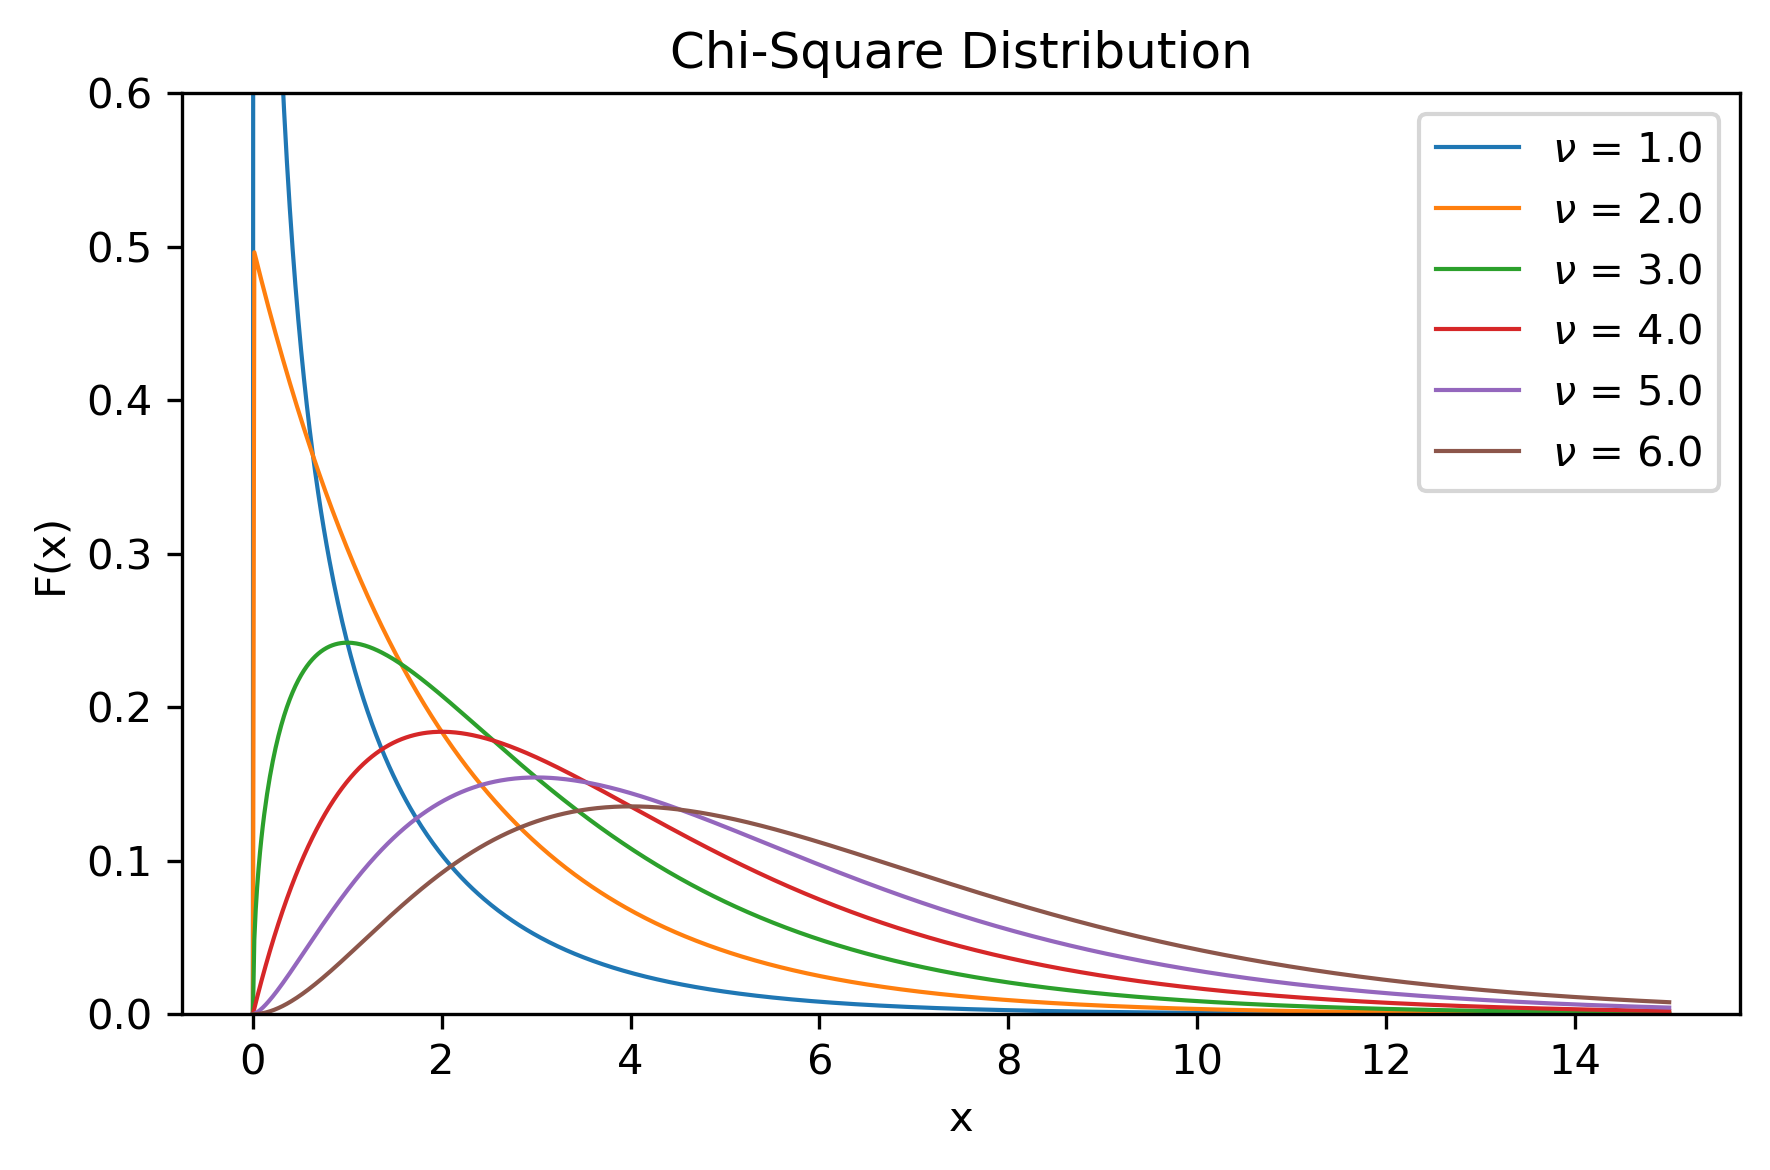

In [6]:
def chi_square_distribution(x, nu=1):
    F = np.zeros(len(x))
    q_p = np.where( x > 0 )
    
    F[q_p] = (np.exp( -x[q_p] /2 ) * x[q_p]**( (nu / 2) -1) ) /  ( special_fn.gamma(nu/2) * 2**( nu / 2 ) )
    return F

nu = np.linspace(1, 6, 6)

x = np.linspace(0, 15, 1000)

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
for i in range(len(nu)):
    ax1.plot(x, chi_square_distribution(x, nu=nu[i]), lw=1, label=r'$\nu$ = '+str(nu[i]))
    
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title(r'Chi-Square Distribution')
ax1.set_ylim([0.0, 0.6])
ax1.legend(loc=0)
fig.tight_layout()
plt.show()

### Student's t Distribution
https://en.wikipedia.org/wiki/Student%27s_t-distribution

$$ 
F(t) =  
\frac{1}{B(1/2, \nu/2) \sqrt{\nu}} \left( 1 + \frac{t^2}{\nu} \right)^{-(\nu\ +\ 1) / 2} 
= \frac{\Gamma(\frac{\nu + 1}{2})}{\sqrt{\pi \nu} \Gamma( \frac{\nu}{ 2} ) } \left(1 + \frac{t^2}{\nu} \right)^{ -(\nu\ + 1)/2 }
$$
where $B(1/2, \nu/2)$ is the beta function, and $\nu$ is the number of degrees.

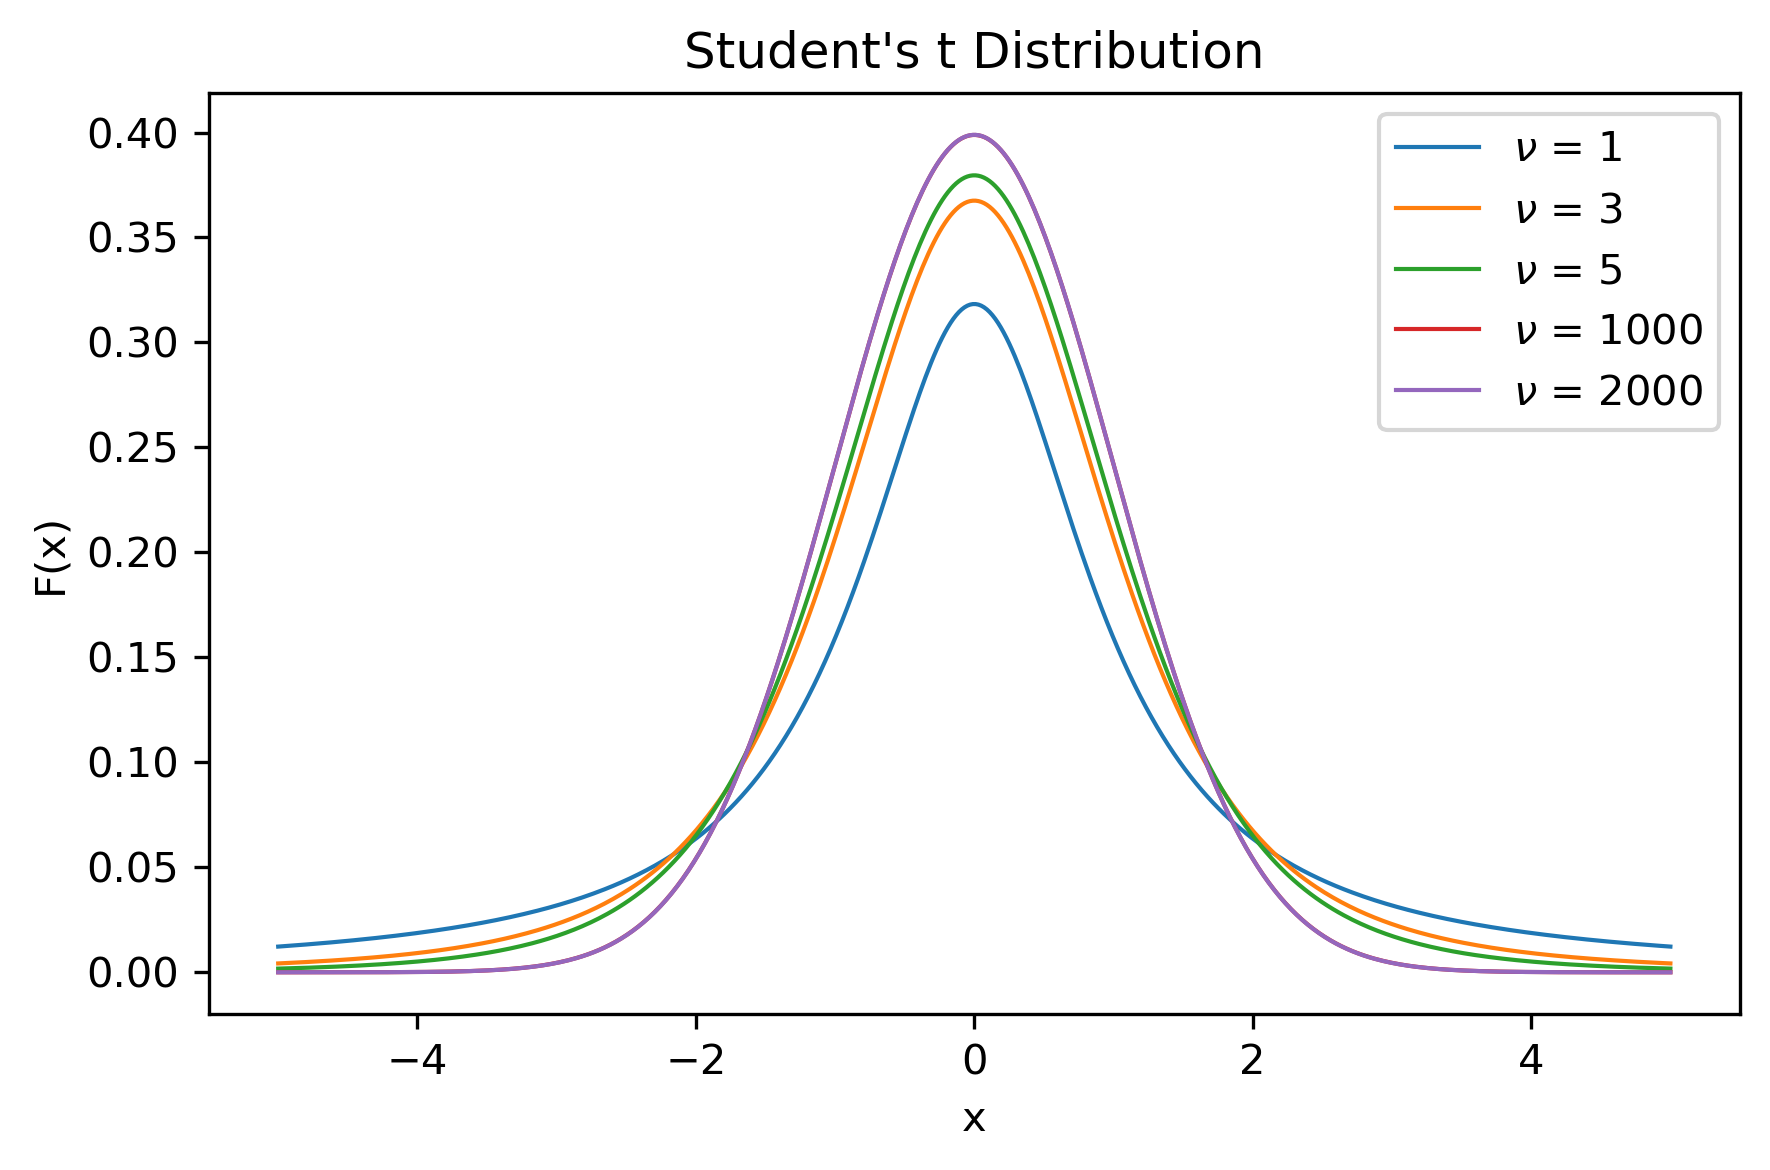

In [7]:
def students_t_distribution(t, nu):
    B = special_fn.beta(1/2, nu/2)
    F = (1 / (B * np.sqrt(nu)) ) * (1 + (t**2 / nu))**( -(nu + 1)/2 )
    return F


t = np.linspace(-5, 5, 500)
nu = [1, 3, 5, 1000, 2000]

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
for i in range(len(nu)):
    ax1.plot(t, students_t_distribution(t, nu[i]), lw=1, label=r'$\nu$ = '+str(nu[i]))

ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title(r"Student's t Distribution")
ax1.legend(loc=0)

fig.tight_layout()
plt.show()

### Pareto Distribution
https://en.wikipedia.org/wiki/Pareto_distribution

$$ 
F(x) = 
\begin{cases}
\begin{eqnarray}
k \beta^{k} x^{-k - 1}\ ,  &\ x > \theta \\
0 &\ ,\ x \leq \theta 
\end{eqnarray}
\end{cases}
$$
where $\beta >0$ and $ k > 0$.  
  
The mean for this distribution exists only if $k > 1$ and it is:
$$\frac{k\beta}{k - 1}$$
The variance for this distribution exists only if $k > 2$ and it is:
$$ \frac{k\beta^2}{(k-1)^2 (k-2)} $$

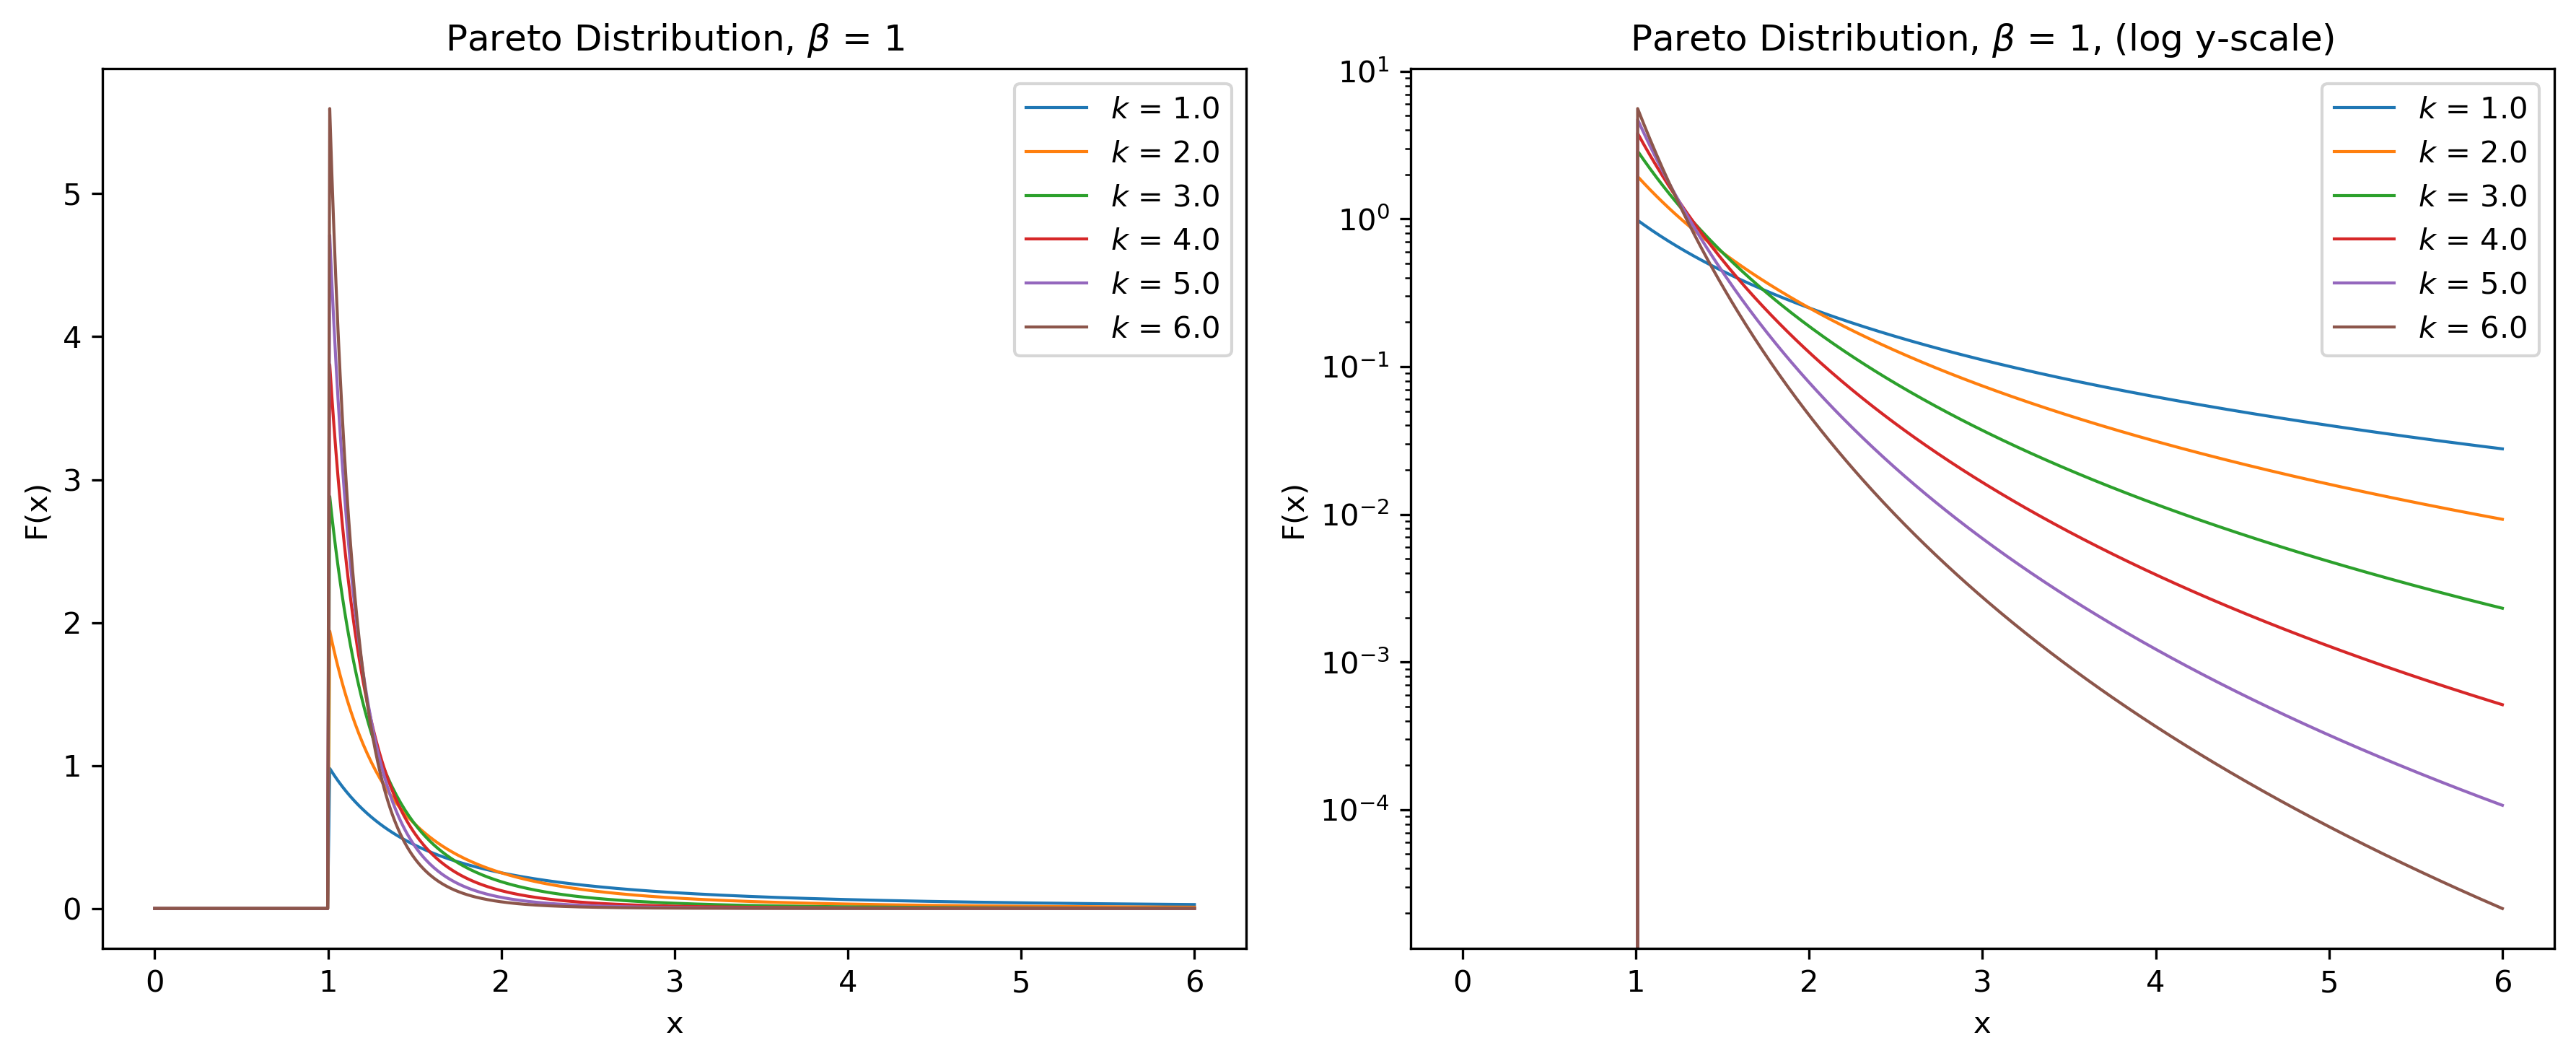

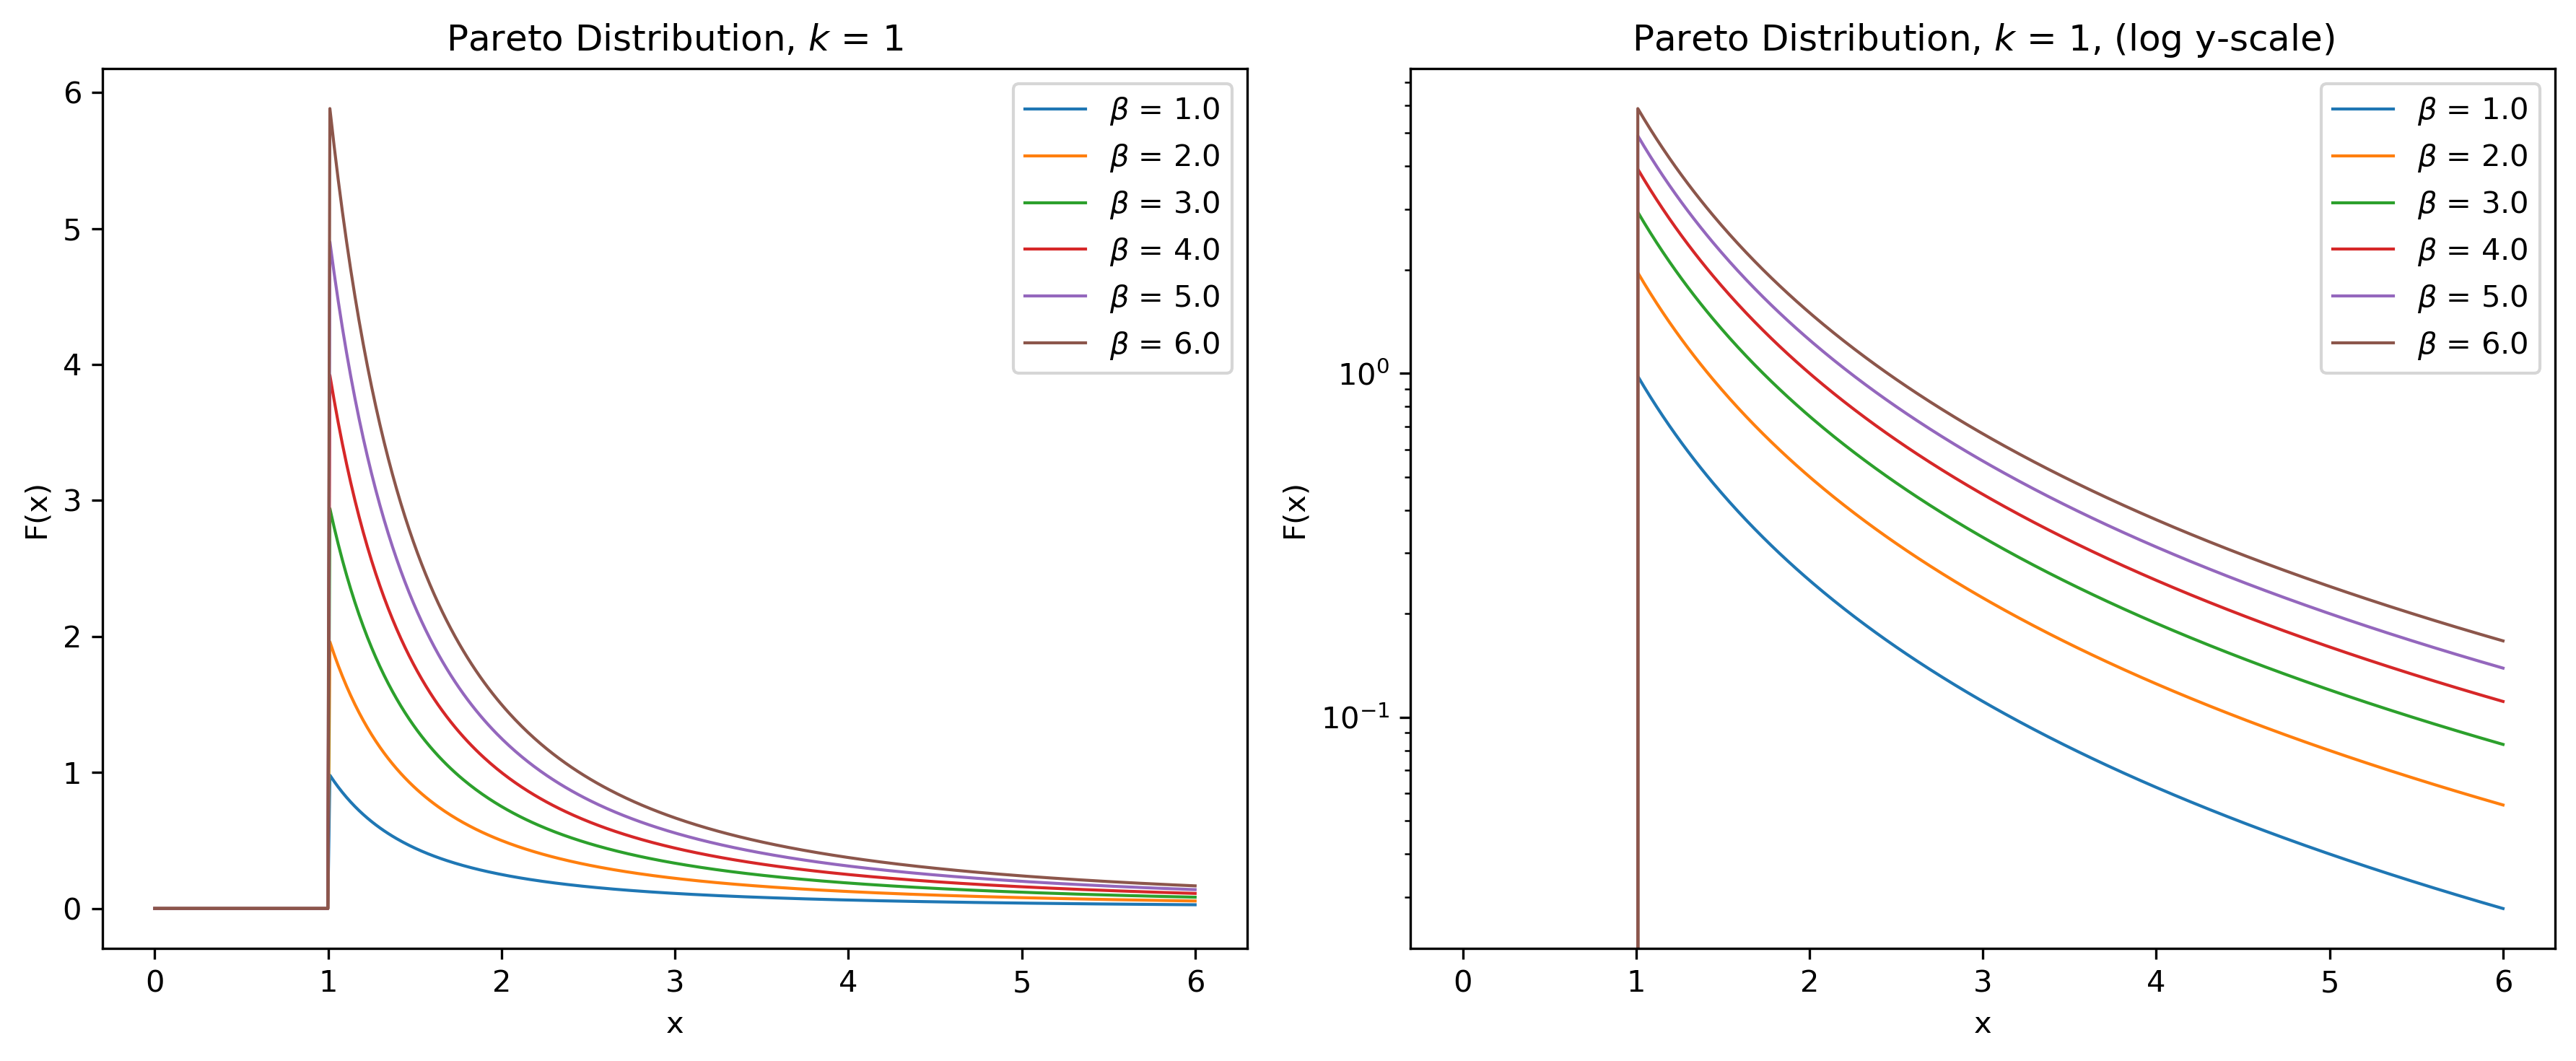

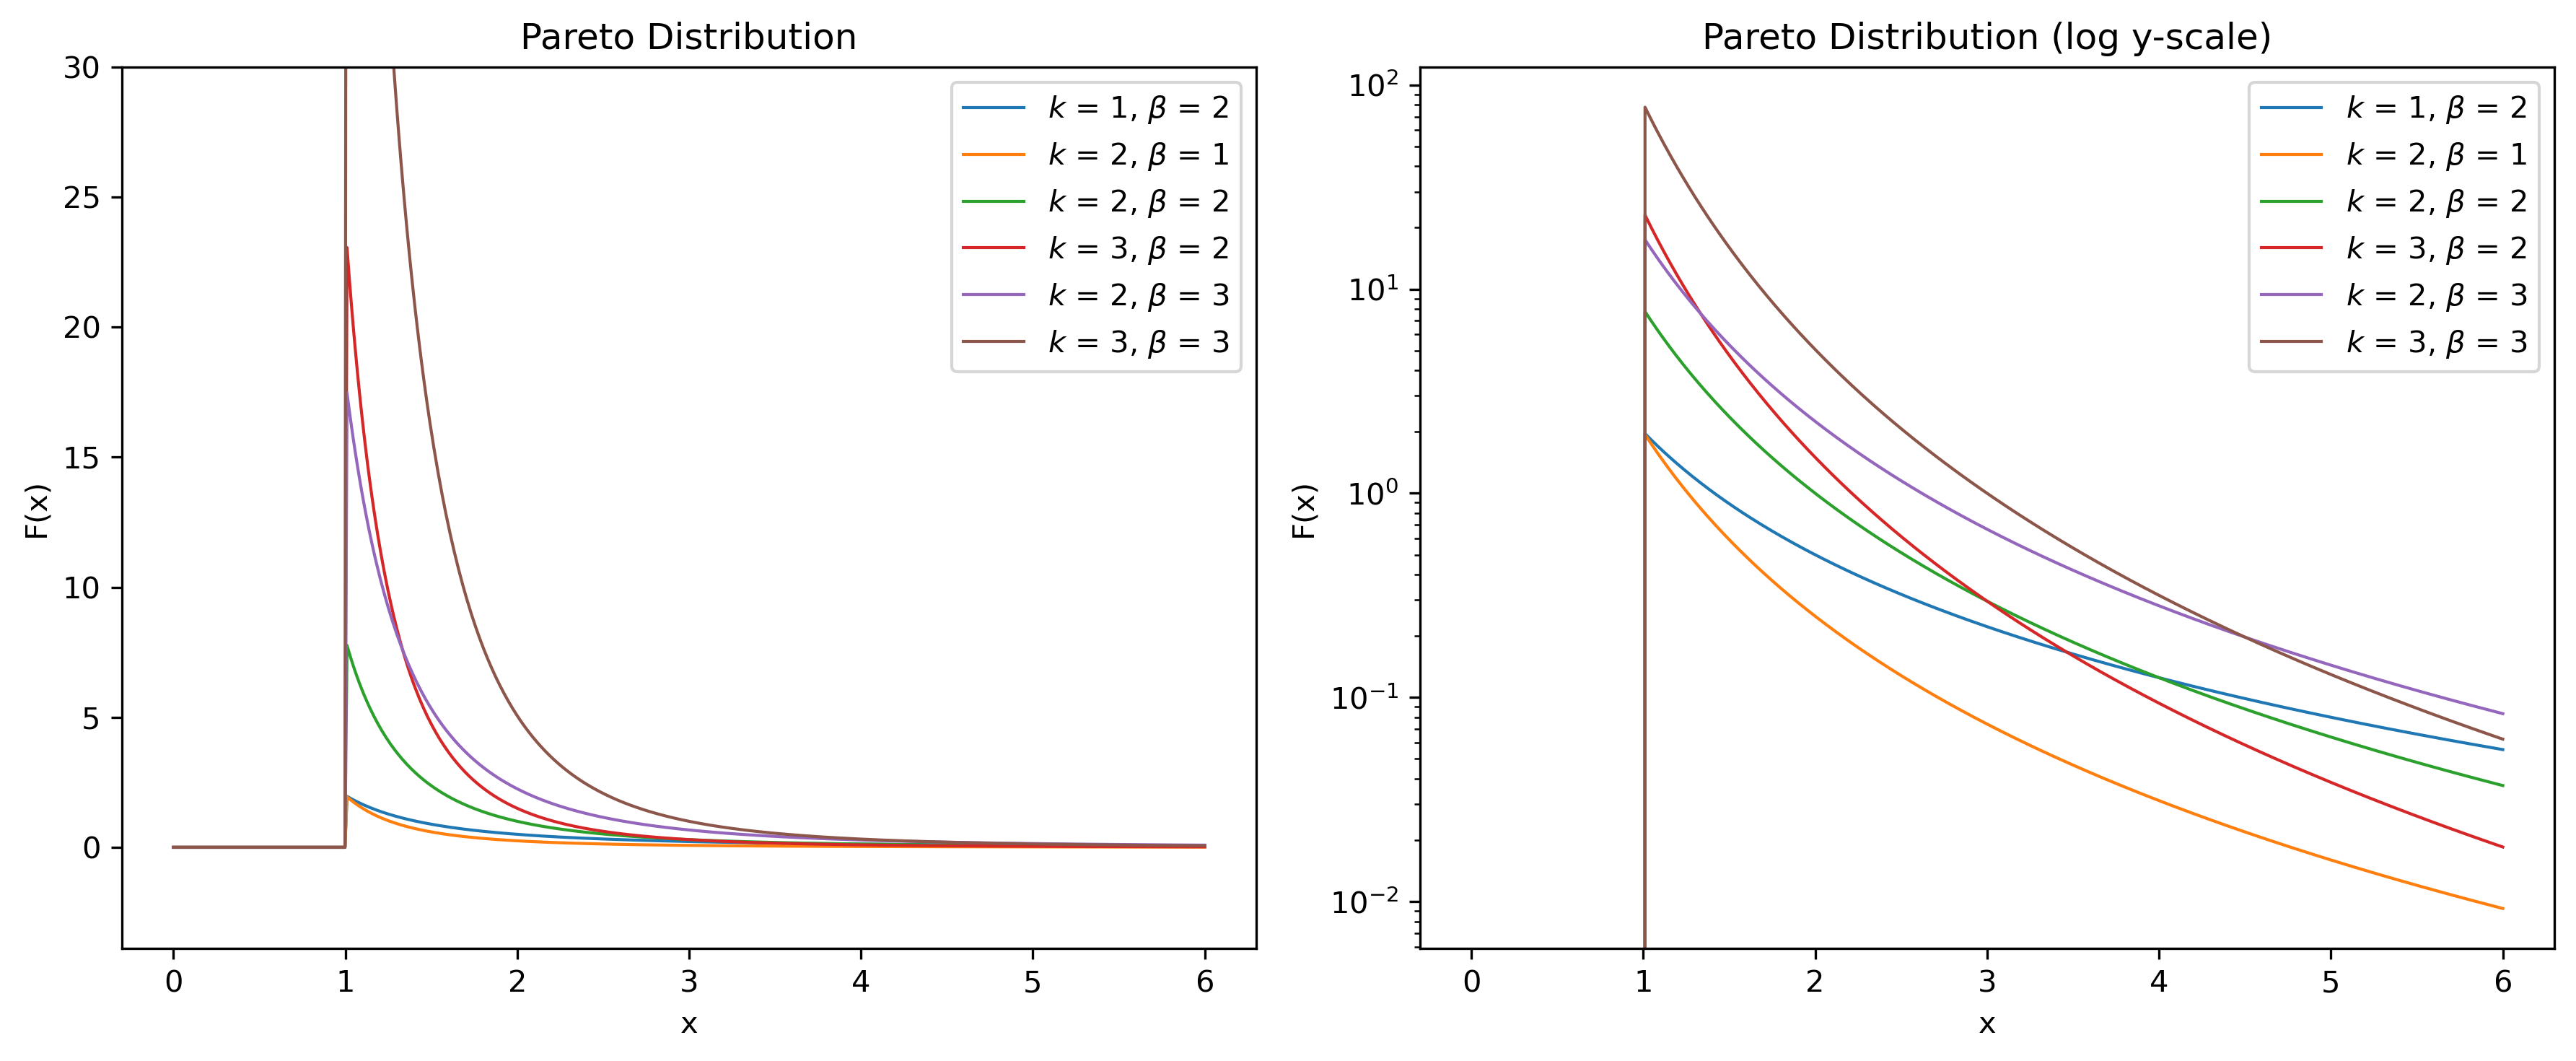

In [15]:
def pareto_distribution(x, k=1, beta=1, theta=1):
    F = np.zeros(len(x))
    q_g = np.where(x > theta)

    F[q_g] = k * beta**k * x[q_g]**(-k - 1)
    return F


x = np.linspace(0, 6, 500)
k = np.linspace(1, 6, 6)
beta = np.linspace(1, 6, 6)


# vary k, and beta is constant
fig = plt.figure(figsize=(12, 5), dpi=300)
ax1 = fig.add_subplot(121)
for i in range(len(k)):
    ax1.plot(x, pareto_distribution(x, k=k[i], theta=1), lw=1, label=r'$k$ = '+str(k[i]))
    
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title(r"Pareto Distribution, $\beta$ = 1")
ax1.legend(loc=0)

ax2 = fig.add_subplot(122)
for i in range(len(k)):
    ax2.plot(x, pareto_distribution(x, k=k[i], theta=1), lw=1, label=r'$k$ = '+str(k[i]))
    
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title(r"Pareto Distribution, $\beta$ = 1, (log y-scale)")
ax2.legend(loc=0)
ax2.set_yscale('log')


fig.tight_layout()
plt.show()



# vary beta, and k is constant
fig = plt.figure(figsize=(12,5),dpi=300)
ax1 = fig.add_subplot(121)
for i in range(len(beta)):
    ax1.plot(x, pareto_distribution(x, beta=beta[i], theta=1), lw=1, label=r'$\beta$ = '+str(beta[i]))
    
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title(r"Pareto Distribution, $k$ = 1")
ax1.legend(loc=0)

ax2 = fig.add_subplot(122)
for i in range(len(beta)):
    ax2.plot(x, pareto_distribution(x, beta=beta[i], theta=1), lw=1, label=r'$\beta$ = '+str(beta[i]))
    
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title(r"Pareto Distribution, $k$ = 1, (log y-scale)")
ax2.legend(loc=0)
ax2.set_yscale('log')

fig.tight_layout()
plt.show()




# Vary both k and beta
k2 = [1, 2, 2, 3, 2, 3]
beta2 = [2, 1, 2, 2, 3, 3]

fig = plt.figure(figsize=(12, 5), dpi=300)
ax1 = fig.add_subplot(121)
for i in range(len(beta)):
    ax1.plot(x, pareto_distribution(x, k=k2[i], beta=beta2[i], theta=1), lw=1, label=r'$k$ = '+str(k2[i])+r', $\beta$ = '+str(beta2[i]))
    
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title(r"Pareto Distribution")
ax1.set_ylim(top=30)
ax1.legend(loc=0)


ax2 = fig.add_subplot(122)
for i in range(len(beta)):
    ax2.plot(x, pareto_distribution(x, k=k2[i], beta=beta2[i], theta=1), lw=1, label=r'$k$ = '+str(k2[i])+r', $\beta$ = '+str(beta2[i]))
    
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title(r"Pareto Distribution (log y-scale)")
ax2.set_yscale('log')
ax2.legend(loc=0)

fig.tight_layout()
plt.show()

### Discrete distributions
1. Binomial distribution
2. Poisson distribution